In [205]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sympy import *

## Simulated $Mn(H_{2}O)_{6}^{2+}$ spectrum

In [206]:
def wavenumber_to_wavlength(df):
    new_df = pd.DataFrame()
    new_df['wavelength'] = 10**7 / df.index
    new_df['intensity'] = df['intensity'].values
    return new_df

def abs_coef(A, c, l):
    return A / (c * l)

def gauss(x, mu, sigma):
    'Normalized'
    return (1 / np.sqrt(2 * np.pi) / sigma * np.exp(-(x - mu) ** 2 / 2. / sigma ** 2))

def spec_calc(x_values, mu_array, sigma_array, scale, baseline):
    new_df = pd.DataFrame(index = x_values)
    spec_array = np.zeros(len(x_values)) + baseline
    peak = scale - baseline
    # print(peak)
    for i, mu in enumerate(mu_array):
        sigma = sigma_array[i]

        def gauss_pdf(x):
            return (1 / sqrt(2 * np.pi) / sigma * exp(-(x - mu) ** 2 / 2. / sigma ** 2))
        
        C = symbols('C')
        pdf = C * gauss_pdf(mu)
        C_val = solve(pdf-peak[i], C)

        spec_i = C_val[0] * gauss(x_values, mu, sigma)
        spec_array += spec_i.astype(float) 

    new_df['intensity'] = spec_array

    return new_df

In [207]:
A = np.array([0.022, 0.016, 0.03, 0.018, 0.018, 0.018]) # , 0.0115
mu_array = np.array([18850, 23100, 25000, 25280, 28050, 29810]) # , 32400
sigma_array = np.array([1300, 800, 100, 150, 500, 250]) # , 1000
wavenumbers = np.linspace(16000, 31000, 10000)

In [208]:
eps_peaks = abs_coef(A, 0.9, 0.85)
print(eps_peaks)
eps_peaks[2] -= 0.003

base = abs_coef(0.008, 0.9, 0.85)

spec = spec_calc(wavenumbers, mu_array, sigma_array, eps_peaks, base)
spec_nm = wavenumber_to_wavlength(spec)

[0.02875817 0.02091503 0.03921569 0.02352941 0.02352941 0.02352941]


[(0.0, 0.055)]

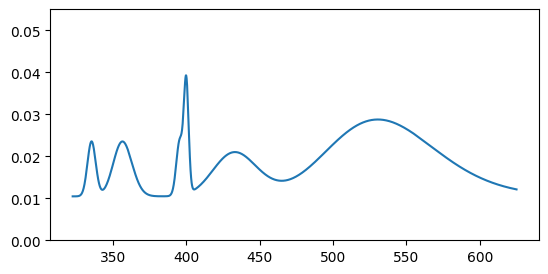

In [209]:
fig, ax = plt.subplots(figsize = (6.3, 3))

ax.plot(spec_nm['wavelength'], spec_nm['intensity'])
ax.set(ylim=(0, 0.055))

## Difference between simulated and experimental